In [39]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [64]:
'''
References:
https://www.start.umd.edu/data-tools/global-terrorism-database-gtd
Global Terrorism Database
https://www.start.umd.edu/about/about-start

A simple statistical analysis of lone wolf terror attacks

'''

'\nReferences:\nhttps://www.start.umd.edu/data-tools/global-terrorism-database-gtd\nGlobal Terrorism Database\nhttps://www.start.umd.edu/about/about-start\n\nA simple statistical analysis of lone wolf terror attacks\n\n'

In [2]:
df = pd.read_excel('globalterrorismdb_0919dist.xlsx')

In [3]:
df.head(999999)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaT,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaT,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaT,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaT,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaT,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [4]:
us_attacks_bool = df['country_txt'] == 'United States'

In [5]:
us_attacks = df[us_attacks_bool]

In [6]:
'''Droped all instances that were not within the United States'''
us_attacks

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
5,197001010002,1970,1,1,NaN,0,NaT,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
7,197001020002,1970,1,2,NaN,0,NaT,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaT,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaT,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN
10,197001050001,1970,1,1,NaN,0,NaT,217,United States,1,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
11,197001060001,1970,1,6,NaN,0,NaT,217,United States,1,...,NaN,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
13,197001090001,1970,1,9,NaN,0,NaT,217,United States,1,...,NaN,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
14,197001090002,1970,1,9,NaN,0,NaT,217,United States,1,...,The fire began at 8:30 PM. The Armed Commandos...,Committee on the Judiciary United States Sena...,"""No Evidence Of Arson Found In Barkers Fire,"" ...","""Toward People's War for Independence and Soci...",Hewitt Project,0,0,0,0,NaN
17,197001120001,1970,1,12,NaN,0,NaT,217,United States,1,...,"One half hour after the bomb explosion, an ano...","""Blast Damages Flatbush School,"" New York Time...","Linda Greenhouse, ""Madison School Puzzled By B...",Committee on Government Operations United Stat...,Hewitt Project,-9,-9,0,-9,NaN
18,197001120002,1970,1,12,NaN,0,NaT,217,United States,1,...,NaN,Committee on the Judiciary United States Sena...,"""Toward People's War for Independence and Soci...",NaN,Hewitt Project,-9,-9,0,-9,NaN


In [7]:
us_attacks.to_csv('us_attacks.csv')

In [8]:
lone_bool  = us_attacks['nperps'] == 1

In [9]:
'''Dropped all instances where the attackers were >1 or unknown (code -99) in the database'''
lone  = us_attacks[lone_bool]

In [10]:
lone

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
8,197001020003,1970,1,2,NaN,0,NaT,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaT,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN
41,197002010001,1970,2,1,NaN,0,NaT,217,United States,1,...,It is suspected that the perpetrator was attem...,Committee on Government Operations United Stat...,"""Arsonist 'Failed,'"" Eugene Register-Guard, Fe...",NaN,Hewitt Project,-9,-9,0,-9,NaN
57,197002090003,1970,2,9,NaN,0,NaT,217,United States,1,...,Part of a multiple attack with 197002080001 an...,"""2 Bombs Explode at G.E. Buildings,"" New York ...","""Puerto Rican Group Describes Bombings,"" New Y...","""Bomb Case Figure Found Guilty Here,"" New York...",Hewitt Project,0,1,0,1,"197002080001, 197002080002, 197002090003"
69,197002160004,1970,2,16,NaN,0,NaT,217,United States,1,...,This attack is linked with 197002160001. The ...,"""San Francisco Bomb Injured 7 Policemen,"" Wash...",NaN,NaN,Hewitt Project,-9,-9,0,-9,"197002160001, 197002160004"
86,197002220002,1970,2,22,NaN,0,NaT,217,United States,1,...,The New Years Gang attempted to bomb the Wisco...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
121,197003100002,1970,3,10,NaN,0,NaT,217,United States,1,...,Police were unsure if the perpetrator acted ou...,Committee on Government Operations United Stat...,"Homer Bigart, ""Maryland Hunts Woman In Blast,""...","Peter A. Jay, ""Bomb Threats in Area,"" Washingt...",Hewitt Project,-9,-9,0,-9,NaN
146,197003220001,1970,3,22,NaN,0,NaT,217,United States,1,...,Part of a multiple attack with 197003220002 an...,Committee on Government Operations United Stat...,"Michael Knight, ""15 at the Electric Circus Inj...","Lawrence Van Gelder, ""Injured Bombing Suspect ...",Hewitt Project,0,0,0,0,"197003220001, 197003220002, 197003220003"
147,197003220002,1970,3,22,NaN,0,NaT,217,United States,1,...,Part of a multiple attack with 197003220001 an...,Committee on Government Operations United Stat...,"Michael Knight, ""15 at the Electric Circus Inj...","Lawrence Van Gelder, ""Injured Bombing Suspect ...",Hewitt Project,0,0,0,0,"197003220001, 197003220002, 197003220003"
148,197003220003,1970,3,22,NaN,0,NaT,217,United States,1,...,Part of a multiple attack with 197003220001 an...,Committee on Government Operations United Stat...,"Michael Knight, ""15 at the Electric Circus Inj...","Lawrence Van Gelder, ""Injured Bombing Suspect ...",Hewitt Project,0,0,0,0,"197003220001, 197003220002, 197003220003"


In [34]:
lone.to_csv('lone_attackers.csv')

In [24]:
lone_year = lone['iyear']
lone_year

8         1970
9         1970
41        1970
57        1970
69        1970
86        1970
121       1970
146       1970
147       1970
148       1970
160       1970
227       1970
259       1970
291       1970
314       1970
354       1970
363       1970
387       1970
391       1970
439       1970
452       1970
471       1970
500       1970
518       1970
598       1970
615       1970
642       1970
669       1971
681       1971
710       1971
          ... 
187372    2018
187906    2018
188196    2018
188607    2018
189659    2018
189825    2018
189863    2018
189864    2018
189865    2018
189866    2018
189867    2018
189868    2018
189870    2018
189871    2018
189888    2018
189889    2018
189890    2018
189917    2018
189918    2018
189919    2018
189920    2018
189944    2018
189992    2018
190082    2018
190107    2018
190108    2018
190109    2018
190291    2018
190628    2018
190937    2018
Name: iyear, Length: 543, dtype: int64

In [40]:
def autoRegression(time_series):
    model = AR(time_series)
    model_fit = model.fit()
    yhat = model_fit.predict(len(time_series), len(time_series))
    print(yhat)
    
def movingAverage(time_series):
    model = ARMA(time_series, order=(0, 1))
    model_fit = model.fit(disp=False)
    yhat = model_fit.predict(len(time_series), len(time_series))
    print(yhat)

def autoRegMA(time_series):
    model = ARMA(time_series, order=(2, 1))
    model_fit = model.fit(disp=False)
    yhat = model_fit.predict(len(time_series), len(time_series))
    print(yhat)

In [51]:
time_series = []
l = list(lone_year)
for i in range(1970,2019):
    count = l.count(i)
    time_series.append(count)

[27,
 10,
 10,
 13,
 7,
 4,
 5,
 4,
 6,
 8,
 14,
 5,
 5,
 6,
 8,
 13,
 6,
 8,
 8,
 4,
 6,
 6,
 12,
 0,
 14,
 14,
 5,
 15,
 9,
 17,
 16,
 9,
 22,
 7,
 3,
 0,
 3,
 4,
 2,
 8,
 13,
 0,
 10,
 8,
 20,
 22,
 34,
 41,
 52]

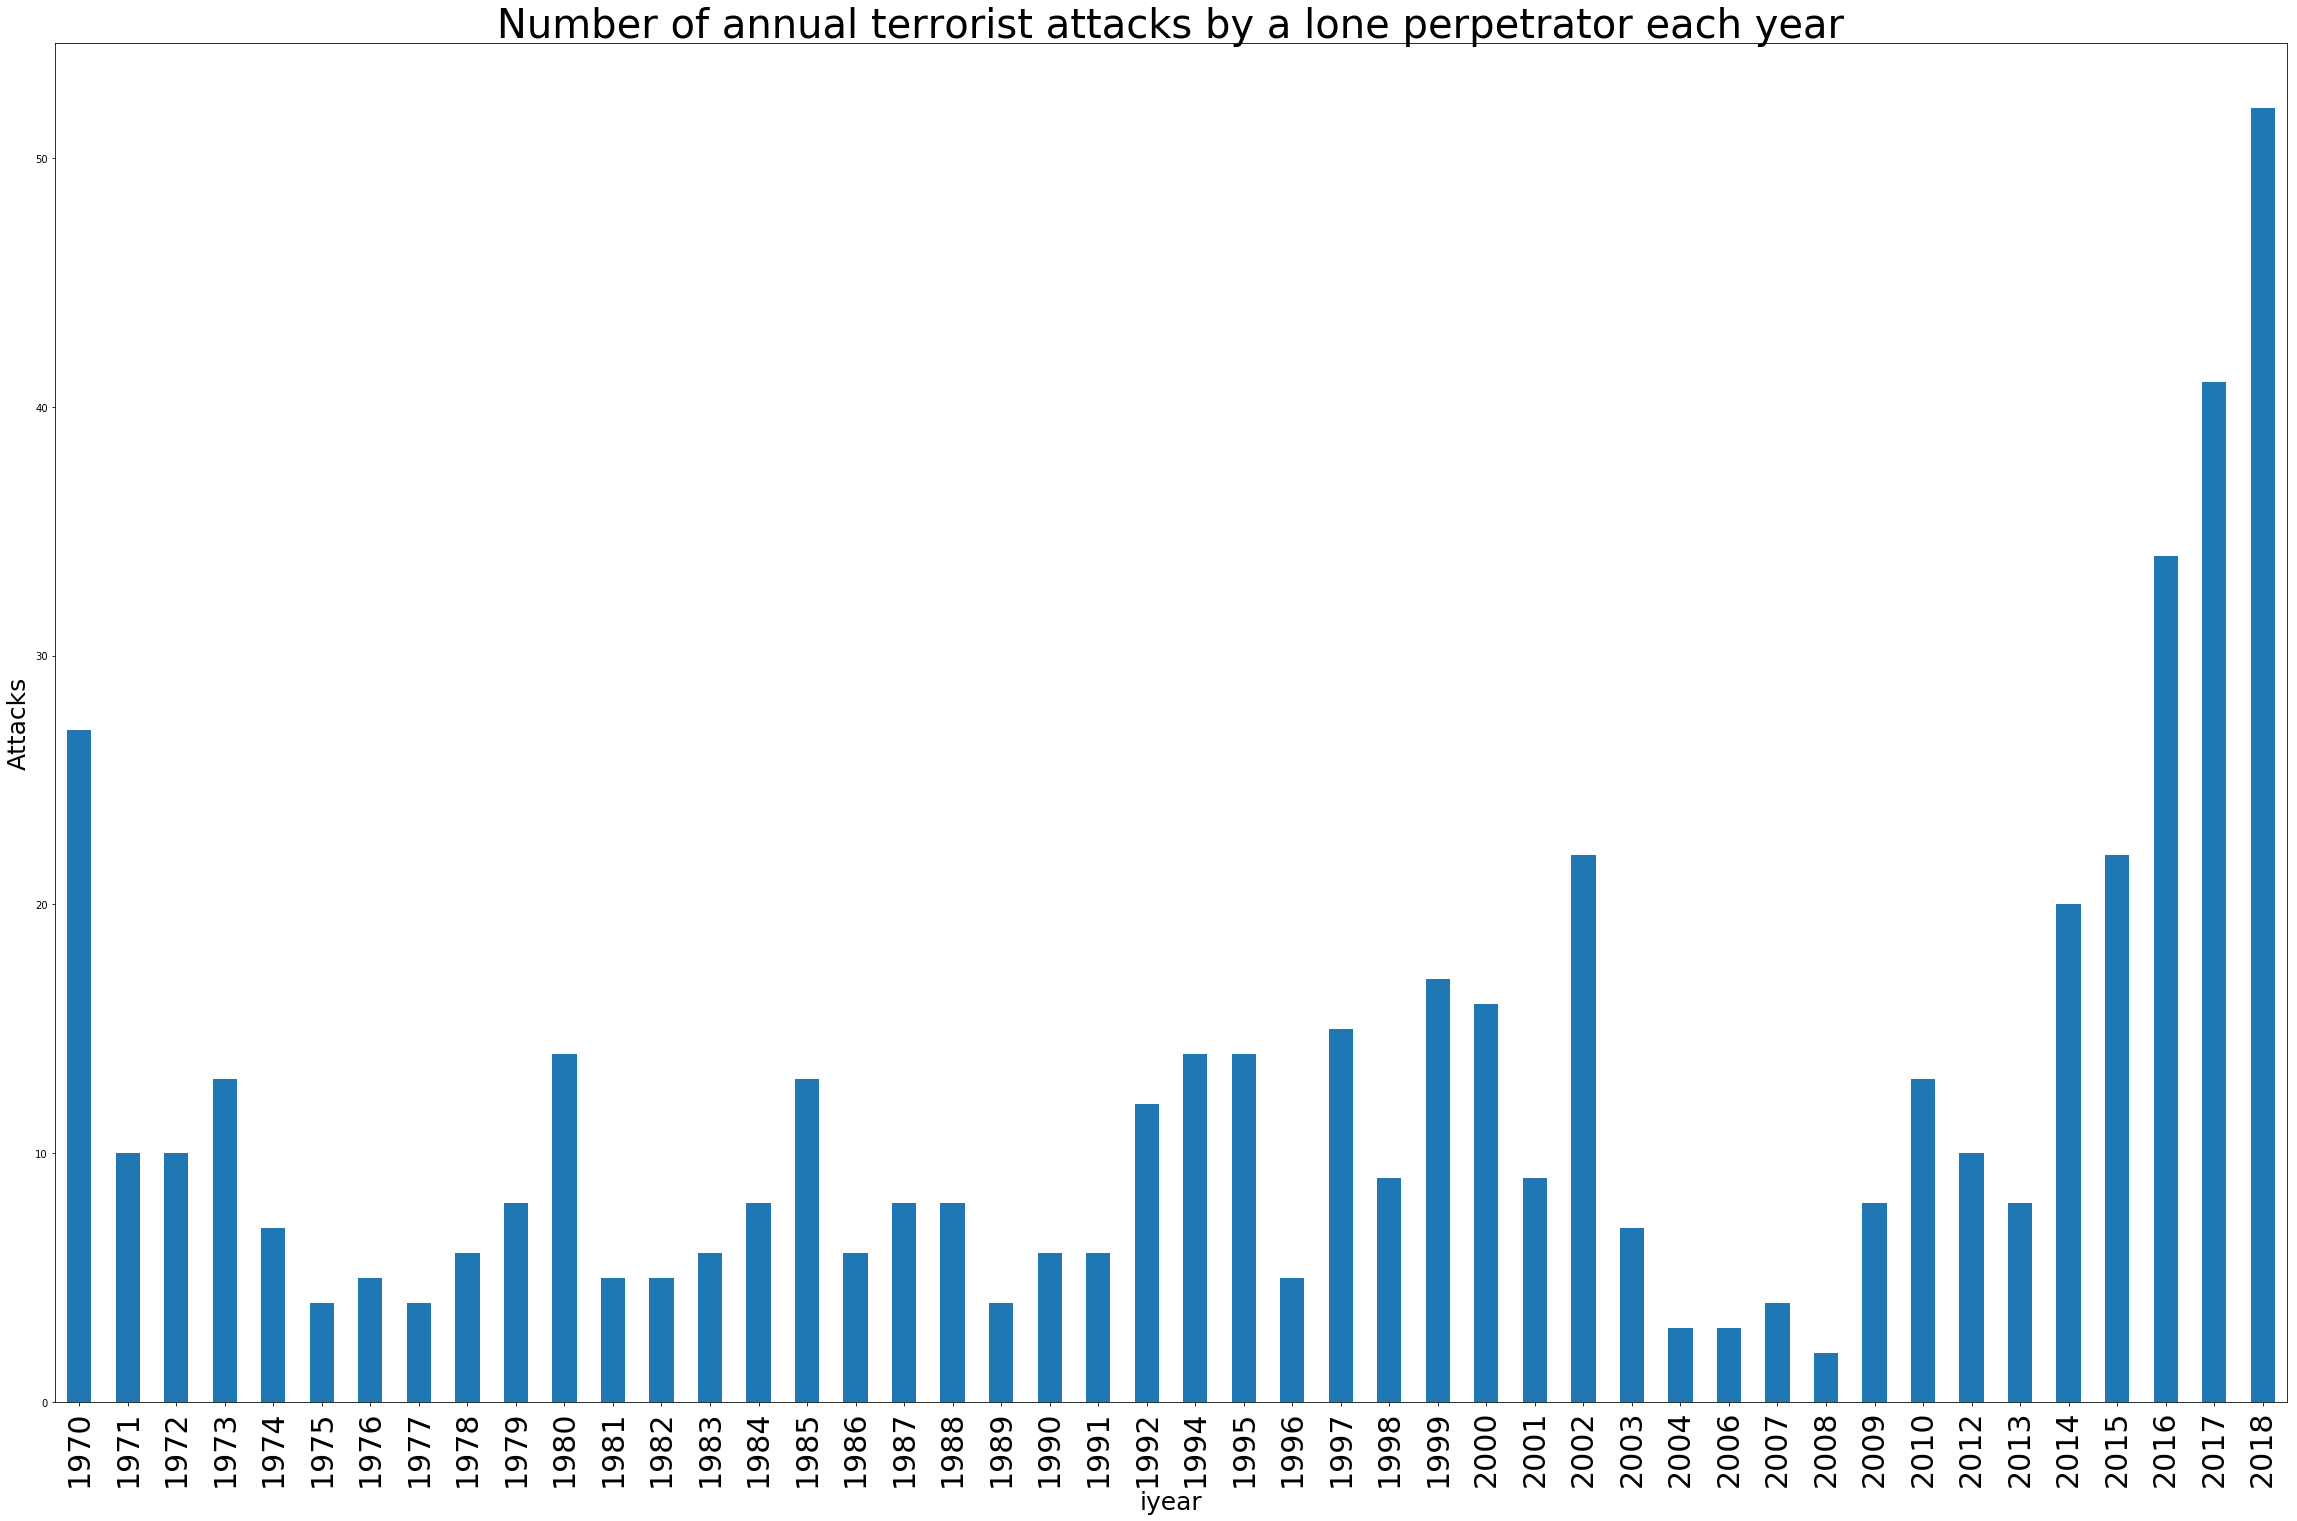

In [38]:
plt.figure(figsize=(40,25))
plt.xticks(fontsize=30)
plt.title('Number of annual terrorist attacks by a lone perpetrator each year',fontsize='40')
plt.xlabel('Years',fontsize='25')
plt.ylabel('Attacks',fontsize='25')
year_groupby = lone_year.groupby(lone["iyear"]).count().plot(kind="bar")


In [59]:
np.mean(time_series)

11.081632653061224

In [60]:
np.median(time_series)

8.0

In [61]:
np.std(time_series)

10.040401517895907

In [53]:
autoRegression(time_series)

[ 48.5287925]


In [54]:
movingAverage(time_series)

[ 27.76247527]


In [62]:
autoRegMA(time_series)

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [63]:
plt.savefig('terrorism.png')